# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("../../data/preprocessed/stemm_lemm_stop_words.pkl")

In [3]:
df.columns

Index(['Facebook Id', 'Post Created', 'Total Interactions', 'Likes',
       'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Message_stpWrd', 'Message_clean_stpWrd', 'Message_clean_stemm_stpWrd',
       'Message_clean_lemm_stpWrd'],
      dtype='object')

En este notebook analizaremos siguientes variables:
- `Message_stpWrd`
- `Message_clean_stpWrd`
- `Message_clean_stemm_stpWrd`
- `Message_clean_lemm_stpWrd`

Específicamente: `Message_clean_lemm_stpWrd`

In [4]:
df[['Message_stpWrd', 'Message_clean_stpWrd', 
    'Message_clean_stemm_stpWrd', 'Message_clean_lemm_stpWrd']].head()

,Message_stpWrd,Message_clean_stpWrd,Message_clean_stemm_stpWrd,Message_clean_lemm_stpWrd
0,Mitigar cambio climático pies tierra. http://r...,mitigar cambio climatico pies tierra,mitig cambi climat pies tierr,mitigar cambio climatico pie tierra
1,#México 🇲🇽 | Ciudad México urbe Latinoamérica ...,mexico ciudad mexico urbe latinoamerica busca ...,mexic ciud mexic urbe latinoamer busc siguient...,mexico ciudad mexico urbe latinoamerica buscar...
2,"2018 comienza deseo corazón hagan disfruten, p...",2018 comienza deseo corazon hagan disfruten ma...,par 2018 comienz dese corazon hag tod disfrut ...,2018 comenzar desear corazon disfrutar mas aun...
3,"ONU lanza alerta roja 2018 armas nucleares, vi...",onu lanza alerta roja 2018 armas nucleares vio...,onu lanz alert roj par 2018 armas nuclear viol...,onu lanzar alerta rojo 2018 arma nuclear viola...
4,Novedoso proyecto busca instalar paneles solar...,novedoso proyecto busca instalar paneles solar...,noved proyect busc instal panel solar lun par ...,novedoso proyecto buscar instalar panel solar ...


In [5]:
df.shape

(87422, 16)

In [6]:
facebook_post_clean = df['Message_clean_lemm_stpWrd'].values.tolist()
facebook_post_clean[:5]

['mitigar cambio climatico pie tierra',
 'mexico ciudad mexico urbe latinoamerica buscar generacion mujer lider',
 '2018 comenzar desear corazon disfrutar mas aun disfrutar repartir amor humano comunidad vivo terrible calentamiento global aun mas serio calentamiento social violencia odio muerte exclusión anular mas denso amorosfera energia amor presente actuante continuo expansion solidaridad amor universal presente esperanza 2018 carino victor quintana',
 'onu lanzar alerta rojo 2018 arma nuclear violacion dh cambio climatico unidad camino insistio secretario futuro depender',
 'novedoso proyecto buscar instalar panel solar luna abastecer energia planeta tierra']

# Preprocess data: Tokenize by lemmatize text

In [7]:
from tqdm import tqdm

A continuación se van a crear los mensajes tokenizados. En este proyecto un token representa una **palabra**.

In [8]:
%time
tokens_spacy = []
for post in tqdm(facebook_post_clean):
    token_i = [token for token in post.split(' ')]
    tokens_spacy.append(token_i)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 16.9 µs


100%|██████████| 87422/87422 [00:02<00:00, 42757.63it/s]


In [9]:
%time
facebook_posts = []
for post in tqdm(facebook_post_clean):
    token_i = [token for token in post]
    facebook_posts.append(token_i)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 18.1 µs


100%|██████████| 87422/87422 [00:03<00:00, 22320.31it/s]


Así se ven los post procesados como tokens:

In [10]:
for i in tokens_spacy[:5]:
    print(i)

['mitigar', 'cambio', 'climatico', 'pie', 'tierra']
['mexico', 'ciudad', 'mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer', 'lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento', 'global', 'aun', 'mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta', 'rojo', '2018', 'arma', 'nuclear', 'violacion', 'dh', 'cambio', 'climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar', 'panel', 'solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']


In [11]:
print(f"Hay un total de {len(tokens_spacy)} mensajes.")

Hay un total de 87422 mensajes.


# Phrase Modelling (N-gram)

In [12]:
import gensim
from collections import Counter

## Bigrams

Creación del modelo para obtener bigramas (*phrase models*)

In [13]:
bigram = gensim.models.Phrases(tokens_spacy)

In [14]:
phrases = gensim.models.Phrases(tokens_spacy, progress_per=10000)

In [15]:
bigram = phrases

In [16]:
sentences = bigram[tokens_spacy]

In [17]:
posts_bigram = bigram[tokens_spacy]

Ahora, procesemos todos los posts utilizando el modelo `bigram`

In [18]:
tokens_bigram = [item for sublist in tokens_spacy for item in bigram[sublist]]
corpus_post_model_bigram = Counter(tokens_bigram)

# Word2Vec

In [19]:
words = [
    'mitigar', #topic 0
    'barack_obama', 'trump', #topic 1
    'cientifico', #topic 2
    'medio_ambiente', 'proyecto', #topic 3
    'presidente', 'casa_blanca', #topic 4
    'carbono', 'co2', 'cambioclimatico', #topic 5
    'planeta', 'vida', 'querer', #topic 6
    'agua', 'gobierno', 'importante', #topic 7
    'riesgo', 'efecto', 'donald_trump', #topic 8
    'animal', 'especie', 'suelo', 'energia_renovable', #topic 9
]

## CBOW

In [20]:
import multiprocessing
from gensim.models import Word2Vec, KeyedVectors

In [21]:
cores = multiprocessing.cpu_count()

Definir el modelo

In [22]:
w2v_model = Word2Vec(
    #min_count=20,
    #window=2,
    #sample=6e-5, 
    #alpha=0.03, 
    #min_alpha=0.0007, 
    #negative=20,
    #vector_size=100
    workers=cores-1,
    sg=0,
)

Construir el vocabulario

In [23]:
w2v_model.build_vocab(posts_bigram, progress_per=10000)

Entrenar / cargar el modelo

In [24]:
w2v_model.train(posts_bigram, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.wv.save('../models/w2v/w2v_cbow.kvmodel')

Comportamiento

In [25]:
for word_i in words:
    similar_words = w2v_model.wv.most_similar(positive=[word_i])
    print(f"- {word_i}:")
    for word, similarity in similar_words[:5]:
        print(f"\t{word}: {similarity}")

- mitigar:
	mitigar_efecto: 0.6568158268928528
	mitigar_impacto: 0.6295522451400757
	contrarrestar: 0.610122561454773
	minimizar_efecto: 0.6071274876594543
	mitigacion: 0.5926177501678467
- barack_obama:
	obama: 0.7298752069473267
	antecesor: 0.6749399900436401
	presidente_estadounidense: 0.6000673174858093
	donaldtrump: 0.5974111557006836
	orden_ejecutivo: 0.5962004065513611
- trump:
	donald_trump: 0.769063413143158
	administracion_trump: 0.7217692136764526
	obama: 0.6417081952095032
	casa_blanco: 0.6226320266723633
	magnate: 0.6208598613739014
- cientifico:
	investigador: 0.6852579116821289
	experto: 0.5383902192115784
	cientifica: 0.5215190649032593
	ciencia: 0.5014263987541199
	investigación: 0.5002416968345642
- medio_ambiente:
	medioambiente: 0.6713836193084717
	entorno_natural: 0.4529058039188385
	medioambiental: 0.44681960344314575
	calidad_vida: 0.41898173093795776
	ambiente: 0.4088831841945648
- proyecto:
	iniciativa: 0.5750144720077515
	proyecto_piloto: 0.5646990537643433
	p

## Skip Gram

In [26]:
w2v_model_sg = Word2Vec(
    #min_count=20,
    #window=2,
    #sample=6e-5, 
    #alpha=0.03, 
    #min_alpha=0.0007, 
    #negative=20,
    #vector_size=100
    workers=cores-1,
    sg=1, # 0: CBOW, 1:SkipGram (SG)
)
w2v_model_sg.build_vocab(
    posts_bigram, 
    progress_per=10000
)
w2v_model_sg.train(
    posts_bigram, 
    total_examples=w2v_model_sg.corpus_count, 
    epochs=30, 
    report_delay=1
)
w2v_model_sg.init_sims(replace=True)

/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_10493/522104665.py:22: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_sg.init_sims(replace=True)


In [27]:
for word_i in words:
    similar_words = w2v_model_sg.wv.most_similar(positive=[word_i])
    print(f"- {word_i}:")
    for word, similarity in similar_words[:5]:
        print(f"\t{word}: {similarity}")

- mitigar:
	real_ignorar: 0.6324738264083862
	mitigacion: 0.6175702810287476
	acuerdodeparis_diamundialdelmedioambiente: 0.6166343688964844
	siembratuarbol_somosagua: 0.6084444522857666
	meridasustentable: 0.6078000068664551
- barack_obama:
	obama: 0.7596992254257202
	presidente_estadounidense: 0.6941325664520264
	presidente_barack: 0.6796662211418152
	alimento_italia: 0.6785914897918701
	presidente_unidos: 0.6672163009643555
- trump:
	presidente_donald: 0.8515974879264832
	donald_trump: 0.8329284191131592
	donald_j: 0.8207350373268127
	presidente_estadounidense: 0.7852088212966919
	casa_blanco: 0.7699518203735352
- cientifico:
	investigador: 0.7872556447982788
	uw: 0.6343178749084473
	bingham: 0.6016221642494202
	universidad_swansea: 0.6015684604644775
	swansea_reino: 0.59540194272995
- medio_ambiente:
	medioambiente: 0.6795229911804199
	ambiente: 0.588155210018158
	recurso_natural: 0.5688627362251282
	coordinacion_secretaria: 0.5664451122283936
	migliolo: 0.5526994466781616
- proyect

# T-SNE

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [29]:
word_vectors = [w2v_model.wv[word] for word in words]
word_vectors = np.array(word_vectors)

word_vectors_sg = [w2v_model_sg.wv[word] for word in words]
word_vectors_sg = np.array(word_vectors_sg)

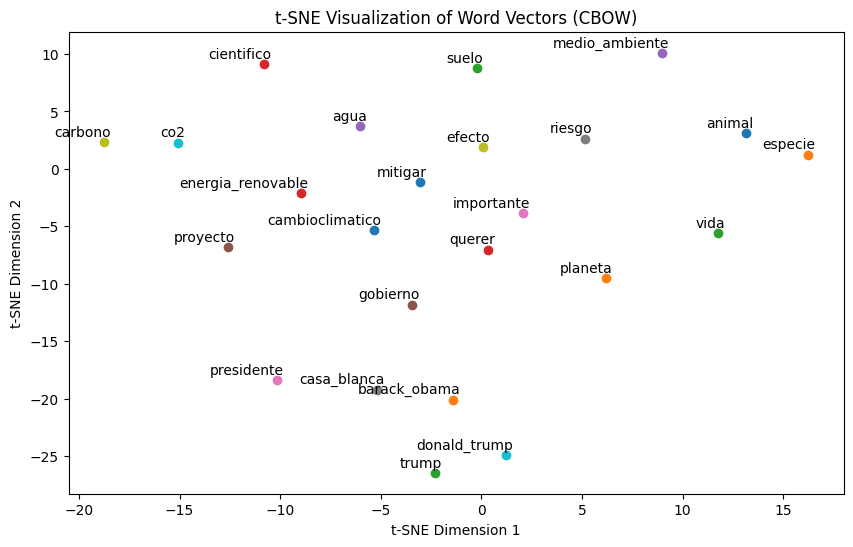

In [30]:
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_vectors = tsne_model.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_vectors[i, 0], tsne_vectors[i, 1])
    plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title('t-SNE Visualization of Word Vectors (CBOW)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

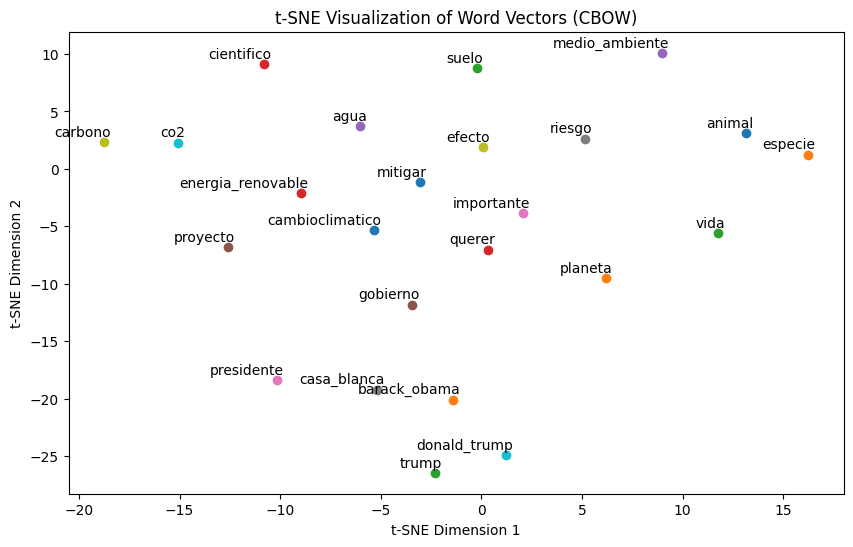

In [31]:
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_vectors = tsne_model.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_vectors[i, 0], tsne_vectors[i, 1])
    plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title('t-SNE Visualization of Word Vectors (CBOW)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()